In [1]:
# First we will import the necessary Library 

import os
import pandas as pd
import numpy as np
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score 
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

#Important library imports...
import seaborn as sns

from sklearn import preprocessing
from numpy import set_printoptions
%matplotlib inline

2023-08-15 12:24:03.289149: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#Data read in...
crypto_data = pd.read_csv('./complete_dataset.csv')
crypto_data.columns.values[0] = 'index'
crypto_data.columns.values[1] = 'DateTime'
#crypto_data.drop('index')
crypto_data.drop(columns=['index'], inplace=True)
crypto_data.head()

,DateTime,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2021-09-13 00:00:00,2.582778,2.590281,2.532714,2.544137,2.544137,0.0,ADA-USD
1,2021-09-13 01:00:00,2.539777,2.548092,2.453710,2.463201,2.463201,47633408.0,ADA-USD
2,2021-09-13 02:00:00,2.466083,2.480330,2.426486,2.430353,2.430353,117902848.0,ADA-USD
3,2021-09-13 03:00:00,2.436902,2.456942,2.417653,2.417653,2.417653,70662656.0,ADA-USD
4,2021-09-13 04:00:00,2.411385,2.439255,2.411385,2.427379,2.427379,109957120.0,ADA-USD


In [3]:
#Ensure the dataset is properly arranged by cryptocurrency and datetime stamp.
df = crypto_data.sort_values(by=['Symbol', 'DateTime'])
pd.to_datetime(df['DateTime'])
df.head()

,DateTime,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2021-09-13 00:00:00,2.582778,2.590281,2.532714,2.544137,2.544137,0.0,ADA-USD
1,2021-09-13 01:00:00,2.539777,2.548092,2.453710,2.463201,2.463201,47633408.0,ADA-USD
2,2021-09-13 02:00:00,2.466083,2.480330,2.426486,2.430353,2.430353,117902848.0,ADA-USD
3,2021-09-13 03:00:00,2.436902,2.456942,2.417653,2.417653,2.417653,70662656.0,ADA-USD
4,2021-09-13 04:00:00,2.411385,2.439255,2.411385,2.427379,2.427379,109957120.0,ADA-USD


In [4]:
#veiwing other portions of the data and the other charcteristics
df.tail()

,DateTime,Open,High,Low,Close,Adj Close,Volume,Symbol
332775,2023-08-13 19:00:00,0.634027,0.637041,0.633796,0.635479,0.635479,10604800.0,XRP-USD
332776,2023-08-13 20:00:00,0.635493,0.635806,0.631865,0.632205,0.632205,16264064.0,XRP-USD
332777,2023-08-13 21:00:00,0.632201,0.632474,0.629548,0.630424,0.630424,7720768.0,XRP-USD
332778,2023-08-13 22:00:00,0.630403,0.630403,0.624903,0.625863,0.625863,42362944.0,XRP-USD
332779,2023-08-13 23:00:00,0.625870,0.627255,0.625636,0.626121,0.626121,10858560.0,XRP-USD


PREPROCESSING

In [5]:
closedf = df[['DateTime', 'Close', 'Symbol']]
print(closedf.head())

groups = closedf.groupby('Symbol')

              DateTime     Close   Symbol
0  2021-09-13 00:00:00  2.544137  ADA-USD
1  2021-09-13 01:00:00  2.463201  ADA-USD
2  2021-09-13 02:00:00  2.430353  ADA-USD
3  2021-09-13 03:00:00  2.417653  ADA-USD
4  2021-09-13 04:00:00  2.427379  ADA-USD


In [6]:
# for symbol, group_df in groups:
#     fig = px.line(group_df, x=group_df.DateTime, y=group_df.Close,labels={'DateTime':'DateTime','Close':'Close Stock'}, title=f'{symbol} - Time vs Close')
#     fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
#     # fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2014-2022', plot_bgcolor='white', 
#     #                 font_size=15, font_color='black')
#     fig.update_xaxes(showgrid=False, type='category')
#     fig.update_yaxes(showgrid=False)
#     #fig.show()

#     #print(group_df.head())

In [7]:
# convert an array of values into a dataset matrix

def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

train_data:  (9983, 1)
test_data:  (6656, 1)
X_train:  (9967, 15)
y_train:  (9967,)
X_test:  (6640, 15)
y_test (6640,)
Epoch 1/200
312/312 [==============================] - 5s 10ms/step - loss: nan - val_loss: nan
Epoch 2/200
312/312 [==============================] - 3s 9ms/step - loss: nan - val_loss: nan
Epoch 3/200
312/312 [==============================] - 3s 10ms/step - loss: nan - val_loss: nan
Epoch 4/200
312/312 [==============================] - 6s 19ms/step - loss: nan - val_loss: nan
Epoch 5/200
312/312 [==============================] - 4s 13ms/step - loss: nan - val_loss: nan
Epoch 6/200
312/312 [==============================] - 5s 15ms/step - loss: nan - val_loss: nan
Epoch 7/200
312/312 [==============================] - 6s 19ms/step - loss: nan - val_loss: nan
Epoch 8/200
312/312 [==============================] - 6s 19ms/step - loss: nan - val_loss: nan
Epoch 9/200
312/312 [==============================] - 7s 22ms/step - loss: nan - val_loss: nan
Epoch 10/200
312/3

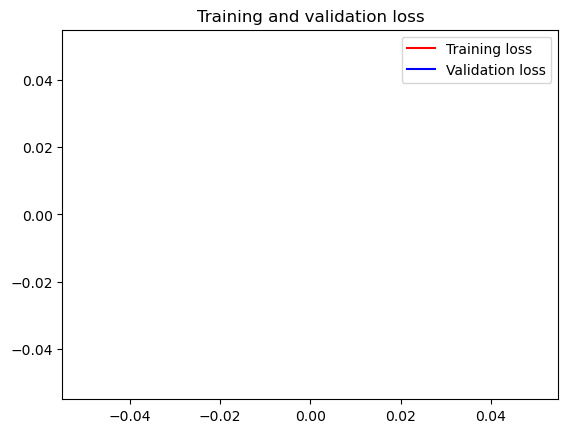

<Figure size 640x480 with 0 Axes>

208/208 [==============================] - 1s 4ms/step
Input contains NaN.
train_data:  (9983, 1)
test_data:  (6656, 1)
X_train:  (9967, 15)
y_train:  (9967,)
X_test:  (6640, 15)
y_test (6640,)
Epoch 1/200
312/312 [==============================] - 5s 10ms/step - loss: nan - val_loss: nan
Epoch 2/200
312/312 [==============================] - 3s 10ms/step - loss: nan - val_loss: nan
Epoch 3/200
312/312 [==============================] - 3s 9ms/step - loss: nan - val_loss: nan
Epoch 4/200
312/312 [==============================] - 3s 9ms/step - loss: nan - val_loss: nan
Epoch 5/200
312/312 [==============================] - 3s 10ms/step - loss: nan - val_loss: nan
Epoch 6/200
312/312 [==============================] - 3s 10ms/step - loss: nan - val_loss: nan
Epoch 7/200
312/312 [==============================] - 3s 9ms/step - loss: nan - val_loss: nan
Epoch 8/200
312/312 [==============================] - 3s 9ms/step - loss: nan - val_loss: nan
Epoch 9/200
312/312 [=====================

KeyboardInterrupt: 

In [8]:
filter1Options = [
      'APT-USD',
      'ARB-USD',
      'AVAX-USD',
      'BNB-USD',
      'BTC-USD',
      'BCH-USD',
      'ADA-USD',
      'LINK-USD',
      'DOGE-USD',
      'ETH-USD',
      'ETC-USD',
      'HBAR-USD',
      'LTC-USD',
      'XMR-USD',
      'MATIC-USD',
      'SHIB-USD',
      'SOL-USD',
      'TRX-USD',
      'WBTC-USD',
      'XRP-USD'
    ]


#convert symbol into dummmy integer values

for symbol, group_df in groups:
    if symbol not in filter1Options:
        print(f'{symbol} not in list...\n')
        continue
    else:
        try:
            #print(group_df.head())
            use_symbol = symbol
            new_group_df = group_df[['DateTime', 'Close']]
            del group_df['Symbol']

            #PLOT GRAPH
            fig = px.line(new_group_df, x=new_group_df.DateTime, y=new_group_df.Close,labels={'DateTime':'DateTime','Close':'Close Stock'})
            fig.update_traces(marker_line_width=2, opacity=0.8, marker_line_color='orange')
            fig.update_layout(title_text=f'Whole period of timeframe of {use_symbol} close price 2014-2022', plot_bgcolor='white', 
                            font_size=15, font_color='black')
            fig.update_xaxes(showgrid=False)
            fig.update_yaxes(showgrid=False)
            #fig.show()

            del new_group_df['DateTime']
            scaler=MinMaxScaler(feature_range=(0,1))
            new_group_df=scaler.fit_transform(np.array(new_group_df).reshape(-1,1))
            #print(new_group_df.shape)

            # we keep the training set as 60% and 40% testing set

            training_size=int(len(new_group_df)*0.60)
            test_size=len(new_group_df)-training_size
            train_data,test_data=new_group_df[0:training_size,:],new_group_df[training_size:len(new_group_df),:1]
            print("train_data: ", train_data.shape)
            print("test_data: ", test_data.shape)


            time_step = 15
            X_train, y_train = create_dataset(train_data, time_step)
            X_test, y_test = create_dataset(test_data, time_step)

            print("X_train: ", X_train.shape)
            print("y_train: ", y_train.shape)
            print("X_test: ", X_test.shape)
            print("y_test", y_test.shape)

            model=Sequential()

            model.add(LSTM(10,input_shape=(None,1),activation="relu"))

            model.add(Dense(1))

            model.compile(loss="mean_squared_error",optimizer="adam")

            history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=200,batch_size=32,verbose=1)

            #import matplotlib.pyplot as plt

            loss = history.history['loss']
            val_loss = history.history['val_loss']

            epochs = range(len(loss))

            plt.plot(epochs, loss, 'r', label='Training loss')
            plt.plot(epochs, val_loss, 'b', label='Validation loss')
            plt.title('Training and validation loss')
            plt.legend(loc=0)
            plt.figure()


            plt.show()

            ### Lets Do the prediction and check performance metrics
            train_predict=model.predict(X_train)
            test_predict=model.predict(X_test)
            train_predict.shape, test_predict.shape

            model.save(f'./All_Models/{use_symbol}.h5')

            # Transform back to original form

            train_predict = scaler.inverse_transform(train_predict)
            test_predict = scaler.inverse_transform(test_predict)
            original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1)) 
            original_ytest = scaler.inverse_transform(y_test.reshape(-1,1)) 

            # Evaluation metrices RMSE and MAE
            print("Train data RMSE: ", math.sqrt(mean_squared_error(original_ytrain,train_predict)))
            print("Train data MSE: ", mean_squared_error(original_ytrain,train_predict))
            print("Train data MAE: ", mean_absolute_error(original_ytrain,train_predict))
            print("-------------------------------------------------------------------------------------")
            print("Test data RMSE: ", math.sqrt(mean_squared_error(original_ytest,test_predict)))
            print("Test data MSE: ", mean_squared_error(original_ytest,test_predict))
            print("Test data MAE: ", mean_absolute_error(original_ytest,test_predict))


            print("Train data explained variance regression score:", 
                explained_variance_score(original_ytrain, train_predict))
            print("Test data explained variance regression score:", 
                explained_variance_score(original_ytest, test_predict))
                
            print("Train data R2 score:", r2_score(original_ytrain, train_predict))
            print("Test data R2 score:", r2_score(original_ytest, test_predict))

            print("Train data MGD: ", mean_gamma_deviance(original_ytrain, train_predict))
            print("Test data MGD: ", mean_gamma_deviance(original_ytest, test_predict))
            print("----------------------------------------------------------------------")
            print("Train data MPD: ", mean_poisson_deviance(original_ytrain, train_predict))
            print("Test data MPD: ", mean_poisson_deviance(original_ytest, test_predict))


            # shift train predictions for plotting

            look_back=time_step
            trainPredictPlot = np.empty_like(new_group_df)
            trainPredictPlot[:, :] = np.nan
            trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
            print("Train predicted data: ", trainPredictPlot.shape)

            # shift test predictions for plotting
            testPredictPlot = np.empty_like(new_group_df)
            testPredictPlot[:, :] = np.nan
            testPredictPlot[len(train_predict)+(look_back*2)+1:len(new_group_df)-1, :] = test_predict
            print("Test predicted data: ", testPredictPlot.shape)

            names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

            print(group_df.head())

            plotdf = pd.DataFrame({'date': group_df['DateTime'],
                                'original_close': group_df['Close'],
                                'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                                'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

            fig = px.line(plotdf,x=plotdf['date'], y=[plotdf['original_close'],plotdf['train_predicted_close'],
                                                    plotdf['test_predicted_close']],
                        labels={'value':'Stock price','date': 'DateTime'})
            fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                            plot_bgcolor='white', font_size=15, font_color='black', legend_title_text='Close Price')
            fig.for_each_trace(lambda t:  t.update(name = next(names)))

            fig.update_xaxes(showgrid=False)
            fig.update_yaxes(showgrid=False)
            fig.show()
        except Exception as e:
            print(e)
            pass

In [ ]:
#Let review some datetime characteristics
print('Earliest date is {} and Latest Date is {}'.format(df.index.min(),df.index.max()))
time_span = df.index.max() - df.index.min()
print('The time span of the dataset is {}'.format(time_span))

In [ ]:
'''This represent 20 months of historic data ensuring recency of the data while avoiding the impact of COVID-19 that 
impacted the cryptocurrency market and other financial markets in a haphazard manner keeping in mind that we may never be able
to model an even tlike a PANDEMIC into our predictive model. In other words, the data points of 2020 and early 2021 are 
considered as outliers'''
#to limit the data to a strict 20 month period, i would limit the data from 15th Dec 2021 to 15th July 2023


In [ ]:
df_trim = df.loc['2021-12-15':'2023-07-15']
df_trim

In [ ]:
df_trim.dtypes

## EXPLORATORY DATA  ANALYSIS

In [ ]:
#Lets take a look at the dataset as a whole
np.set_printoptions(precision=3, threshold=75)
df_trim.describe()

# Univariate Analysis

### Univariate Analysis using the BTC subset

In [ ]:
#Lets take a look at the BTC data.
df_BTC = df_trim.loc[df_trim['Symbol']== 'BTC-USD']
df_BTC.head()

In [ ]:
# Resample the data to a monthly frequency and calculate the mean for each month
df_BTC_monthly = df_BTC.resample('M').mean()

plt.figure(figsize=(11,6))

# Create a line plot using Seaborn
sns.lineplot(data=df_BTC_monthly, 
             x=df_BTC_monthly.index.map(lambda x: x.strftime('%m-%y')),
             y='Adj Close'
          )
plt.xticks(df_BTC_monthly.index.map(lambda x: x.strftime('%m-%y')), rotation='40')

plt.show()

In [ ]:
df_BTC.shape

In [ ]:
df_BTC.isnull().sum()

In [ ]:
df_BTC.dtypes

In [ ]:
#Lets create  target values(closing value of next day and a difference or gain) in the dataset 
df_BTC_2 = df_BTC.assign(close_next = df_BTC['Open'].shift(-1),
                     diff= df_BTC['Adj Close']-df_BTC['Open']).drop('Symbol', axis=1)
df_BTC_2
#This will create 2 output features >>>>>Close_next >> & >>>>>Diff

In [ ]:
#in order to determine if the data has any trends, a simple plot of each column is used.
df_BTC_2.plot(subplots= True, figsize=(10,14))

In [ ]:
#Exploring the features most predictive of the target values
plt.figure(figsize=(10, 6)) 
df_BTC_corr = round(df_BTC_2.corr(),3)
sns.heatmap(df_BTC_corr, annot= True, cmap = 'crest')

In [ ]:
for i,column in enumerate(df_BTC_2.columns):
    sns.histplot(df_BTC_2[column],kde=True, bins=30)  # Create the histogram using Seaborn
    plt.title(f'Histogram of {column} amount')  # Add a title for each histogram
#   plt.xlabel({column})  # Add x-axis label (column name)
    plt.ylabel('Frequency')  # Add y-axis label
    plt.tight_layout()
    plt.show()  # Display the histogram
# fig,((ax0,ax1), (ax2,ax3), (ax4,ax5),(ax6,ax7)) = plt.subplots(nrows=4, ncols=2)

# fig,axes = plt.subplots(nrows=4, ncols=2, figsize=(10,12))

# for i, columns in enumerate(df_BTC_2.columns):
#     row = i // 2
#     col = i % 2
    
#     ax = axes[row,col]
#     ax.hist(df_BTC_2[column], bins=50)
#     ax.set_title(f'Histogram of {column} amount')  # Add a title for each histogram
#     ax.set_ylabel('Frequency')  # Add y-axis label
    
# plt.tight_layout()
# plt.show()  # Display the histogram

In [ ]:
#We need to find a way  to generalize these characteristics to the larger data that is 
# that is, the possibility that all the cryptocurrencies in the larger dataset follow these characteristics.


In [ ]:
#In order to explore the data properly each cryptocurrency needs to be explored independently.

In [ ]:
#Seperate the dataset in Training and testing datasets.

In [ ]:
# if (df['Symbol']==df['Symbol'].shift()).all():
#     df['previous_close'] = df.shift(1)['Adj Close'] 
# df.head()

In [ ]:
# for i, row in crypto_data:
#     if crypto_data(i)['Symbol'] == crypto_data.shift(i)['Symbol']:
#         crypto_data['Diff_Close'] = crypto_data.shift(i)['Adj Close'] - crypto_data(i)['Adj Close']

# crypto_data['Diff_Close'] = crypto_data.groupby('Symbol')['Adj Close'].diff().shift(-1)

In [ ]:
# df['GainOrLoss'] = df['Adj Close'] - df['previous_close']
# df[500:700:10]

In [ ]:
# df.shape

In [ ]:
# The pre-processing of the data would involve extensive extensive data mungling and feature enginnering
# Hence data splitting would be done early to avoid spilling future data in to the past.


In [ ]:
# BTC_df = (df[df['Symbol']=='BTC-USD']).sort_values(by='DateTime', ascending=False )

# plt.figure(figsize=(12,10))
    
# ax1= sns.lineplot(x=BTC_df.index,
#     y='Adj Close',
#     data=BTC_df,        
#     linewidth= 3,
#     sort=True)
# plt.show()

In [ ]:
# !pip install sktime
# from sktime import plot_series